In [1]:
import warnings
warnings.filterwarnings("ignore")

import torch
from xopt import Xopt

# set values if testing
import os
SMOKE_TEST = os.environ.get("SMOKE_TEST")

YAML = """
generator:
    name: bayesian_exploration

evaluator:
    function: xopt.resources.test_functions.tnk.evaluate_TNK

vocs:
    variables:
        x1: [0, 3.14159]
        x2: [0, 3.14159]
    objectives: {y1: MINIMIZE}
    constraints:
        c1: [GREATER_THAN, 0]
        c2: [LESS_THAN, 0.5]
    constants: {a: dummy_constant}

"""

In [2]:
X = Xopt.from_yaml(YAML)

# for testing purposes only
if SMOKE_TEST:
    X.generator.numerical_optimizer.n_restarts = 1
    X.generator.n_monte_carlo_samples = 1

X


            Xopt
________________________________
Version: 0+untagged.1234.gab496ac.dirty
Data size: 0
Config as YAML:
dump_file: null
evaluator:
  function: xopt.resources.test_functions.tnk.evaluate_TNK
  function_kwargs:
    raise_probability: 0
    random_sleep: 0
    sleep: 0
  max_workers: 1
  vectorized: false
generator:
  computation_time: null
  fixed_features: null
  gp_constructor:
    covar_modules: {}
    mean_modules: {}
    name: standard
    trainable_mean_keys: []
    use_low_noise_prior: true
  max_travel_distances: null
  model: null
  n_candidates: 1
  n_monte_carlo_samples: 128
  name: bayesian_exploration
  numerical_optimizer:
    max_iter: 2000
    n_restarts: 20
    name: LBFGS
  turbo_controller: null
  use_cuda: false
max_evaluations: null
serialize_inline: false
serialize_torch: false
strict: true
vocs:
  constants:
    a: dummy_constant
  constraints:
    c1:
    - GREATER_THAN
    - 0.0
    c2:
    - LESS_THAN
    - 0.5
  objectives:
    y1: MINIMIZE
  ob

In [3]:
X.random_evaluate(5)

for i in range(5):
    print(f"step {i}")
    X.step()

step 0
step 1
step 2
step 3
step 4


In [4]:
print(X.data)

          x1        x2               a        y1        y2        c1  \
0   3.006727  0.258302  dummy_constant  3.006727  0.258302  8.087298   
1   2.716331  0.273934  dummy_constant  2.716331  0.273934  6.457223   
2   0.941364  0.925853  dummy_constant  0.941364  0.925853  0.644252   
3   1.764420  1.989039  dummy_constant  1.764420  1.989039  6.011805   
4   0.780162  2.523392  dummy_constant  0.780162  2.523392  5.967651   
6   0.000000  0.180973             NaN  0.000000  0.180973 -1.067249   
7   1.255802  0.000000             NaN  1.255802  0.000000  0.477038   
8   0.000000  1.243755             NaN  0.000000  1.243755  0.446926   
9   0.604964  0.991284             NaN  0.604964  0.991284  0.427770   
10  1.179942  0.596614             NaN  1.179942  0.596614  0.712635   

          c2  xopt_runtime  xopt_error  
0   6.342100      0.000021       False  
1   4.963228      0.000004       False  
2   0.376153      0.000003       False  
3   3.815996      0.000003       False  
4 

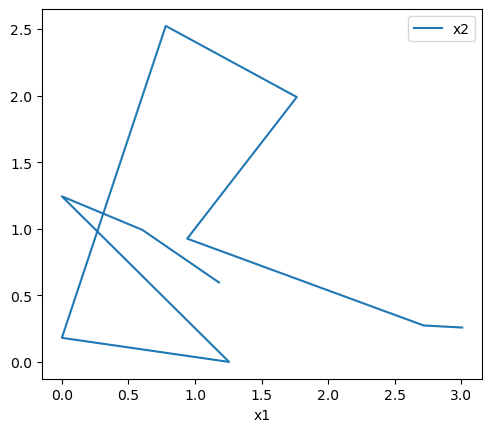

In [5]:
# plot results
ax = X.data.plot("x1", "x2")
ax.set_aspect("equal")

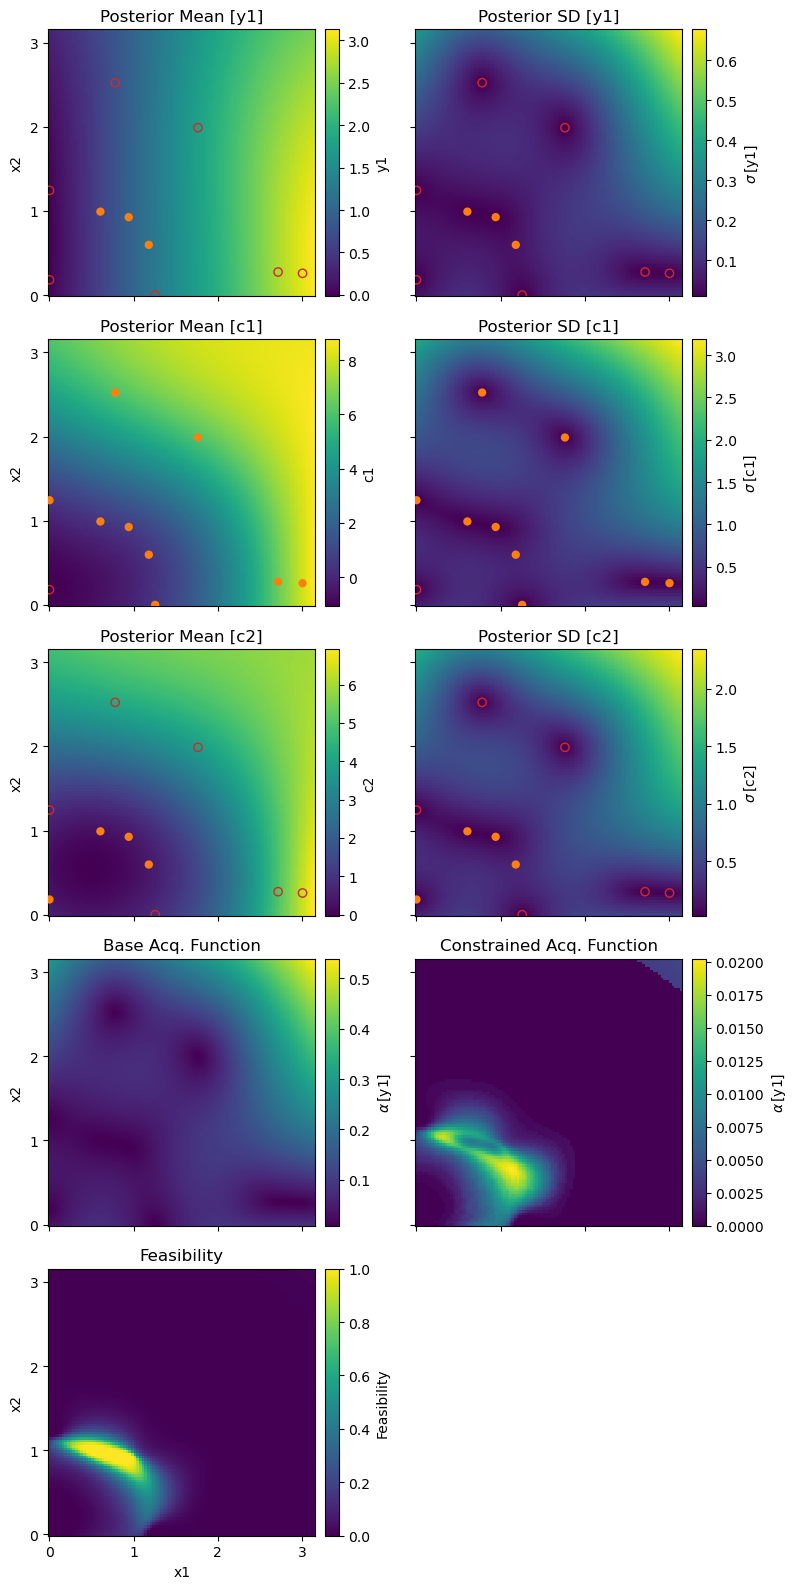

In [6]:
fig, ax = X.generator.visualize_model(show_feasibility=True, n_grid=100)